# 词袋模型

词袋模型（Bag of Words，简称 BoW）是自然语言处理（NLP）中常用的文本表示方法，它将文本转化为数值特征（向量），进而可以用于机器学习等高阶处理。词袋模型将语料转化为二维矩阵，横向为所有在训练数据中出现的不重复的词汇（word），纵向为语料各句子或文档（document）。

简单来说，词袋模型可以帮助大家计算词频。

In [139]:
# 导入数据
import pandas as pd
text_ana = pd.read_csv('#ChatGPT#(1).csv', index_col = 0)
# text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana

,uid,content,retweets,comments,star,time
mid,,,,,,
4995637260851024,3171256063,"【🔥ChatGPT为Megan想了一个全套应对方案\n】\nChatGPT说：""如果我是Me...",142,80,1737,01月29日 21:50
5004272983084403,6444741184,从零开始学习大语言模型（一）\n做了一期大语言模型教程，不要299，也不要199，关注免费更...,109,14,221,02月22日 17:45
4997285800837908,3171256063,【ChatGPT辣评🌶】“认为文科没用的人，可能正是因为缺乏文科的教育，才看不到文科的价值所...,22,13,181,02月03日 11:00
4994965230848942,6182606334,另一个GPTs调用能力的牛批演示，在一个聊天中先使用Grimoire构建一个网页。\n然后直...,105,2,87,01月28日 01:19
4994859628232994,6182606334,昨晚ChatGPT推出了通过在正常的聊天中@ 其他GPTs协同处理任务的能力，这个能力非常强...,78,5,105,01月27日 18:19
...,...,...,...,...,...,...
4871691933845398,2375086267,【“双标”让\n#ChatGPT#\n光环褪色】托比亚斯·茨温曼是德国咨询公司RAPYD.A...,32,10,106,2023年02月21日 21:15
4871328748017037,1298124720,超逆马之前吹嘘美国铁路的名场面，他又声称美国铁路绝对值得中国铁路学习。\n学习什么呢？\n学...,35,43,241,2023年02月20日 21:12
4867670720386309,5999784751,#教师会被ChatGPT取代吗#\n\n#微博开学季#\n大声告诉我，人工智能最不能取代的职...,30,27,140,2023年02月10日 18:56


In [140]:
# 分析语料
text = list(text_ana['content'])
text

['【🔥ChatGPT为Megan想了一个全套应对方案\n】\nChatGPT说："如果我是Megan，面对Nicki的这波热辣攻势，我得来点既机智又有趣的回应，不能让这场较量变成单调的对峙。🌪️🎤\n1. 发行反击单曲：我会制作一首反击单曲，不仅歌词要机智有力，而且风格上要和Nicki截然不同，展现我的独特魅力。可能会给这首歌起个讽刺的名字，比如《Big Heart》或者《Not Just a Foot》。\n2. 推特对决：在Twitter上发起一场“战争”，用幽默和智慧回击Nicki的言论。比如回复说：“听了Nicki的《Big Foot》，我决定去做个足底按摩，感谢她提醒我照顾好自己！👣💆\u200d♀️ SelfCare”\n3. 制作搞笑视频：在TikTok或Instagram上发布一段搞笑视频，模仿Nicki的风格，但用夸张的手法来表现，向大家展示即使在争执中，我也能保持轻松和幽默的心态。\n4. 慈善活动：举办一场慈善活动，宣称每次Nicki提到我的名字，我就会为某个慈善机构捐款。这样一来，她每一次攻击都会转化为对社会的善举。\n5. 与粉丝互动：发起一个社交媒体挑战，让粉丝们来提供最有趣的回复Nicki的方式。这样不仅可以让粉丝参与进来，也可以从中收集一些灵感。\n当然，这一切都得在保持艺人形象和专业态度的基础上进行。毕竟，即使是在冲突中，也要保持风度和创意，让这场较量成为一场风趣的交流，而不是令人不快的争斗。😏🌟"\n#麻辣鸡开撕megan#\n\n#chatgpt#\n\n#GPT4为何会颠覆现有工作流#',
 '从零开始学习大语言模型（一）\n做了一期大语言模型教程，不要299，也不要199，关注免费更新。\n#免费AI课程#\n\n#chatgpt#\n#Sora#\n\nL\n林亦LYi的微博视频',
 '【ChatGPT辣评🌶】“认为文科没用的人，可能正是因为缺乏文科的教育，才看不到文科的价值所在！”\n当许多人因为就业率而歧视文科之时，ChatGPT等AI却在拼命学习文科和理科知识，一个都不放过！这还不能说明什么吗？\nChatGPT 刚刚辣评："哦，深刻的话题来了！如果我像某些理工科至上主义者那样，只接收理科知识，不接收文科的知识，那我可能会变成一个冷冰冰、逻辑至上、没有情感和同理心的机器。我会知道如何计算宇宙的年龄，但我不会理解人

## jieba分词

In [141]:
# pip install jieba
import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['content'] = text_ana['content'].iloc[:100]\
                                .astype(str).apply(word_segmentation)
text_ana['content'].head()

mid
4995637260851024    【 🔥 ChatGPT 为 Megan 想 了 一个 全套 应对 方案 \n 】 \n Ch...
5004272983084403    从零开始 学习 大 语言 模型 （ 一 ） \n 做 了 一期 大 语言 模型 教程 ， 不...
4997285800837908    【 ChatGPT 辣评 🌶 】 “ 认为 文科 没用 的 人 ， 可能 正是 因为 缺乏 ...
4994965230848942    另 一个 GPTs 调用 能力 的 牛批 演示 ， 在 一个 聊天 中先 使用 Grimoi...
4994859628232994    昨晚 ChatGPT 推出 了 通过 在 正常 的 聊天 中 @   其他 GPTs 协同 ...
Name: content, dtype: object

In [142]:
text = list(text_ana['content'].dropna())
text

['【 🔥 ChatGPT 为 Megan 想 了 一个 全套 应对 方案 \n 】 \n ChatGPT 说 ： " 如果 我 是 Megan ， 面对 Nicki 的 这波 热辣 攻势 ， 我 得来 点 既 机智 又 有趣 的 回应 ， 不能 让 这场 较量 变成 单调 的 对峙 。 🌪 ️ 🎤 \n 1 .   发行 反击 单曲 ： 我会 制作 一首 反击 单曲 ， 不仅 歌词 要 机智 有力 ， 而且 风格 上要 和 Nicki 截然不同 ， 展现 我 的 独特 魅力 。 可能 会 给 这 首歌 起个 讽刺 的 名字 ， 比如 《 Big   Heart 》 或者 《 Not   Just   a   Foot 》 。 \n 2 .   推特 对决 ： 在 Twitter 上 发起 一场 “ 战争 ” ， 用 幽默 和 智慧 回击 Nicki 的 言论 。 比如 回复 说 ： “ 听 了 Nicki 的 《 Big   Foot 》 ， 我 决定 去 做 个 足底 按摩 ， 感谢 她 提醒 我 照顾 好 自己 ！ 👣 💆 \u200d ♀ ️   SelfCare ” \n 3 .   制作 搞笑 视频 ： 在 TikTok 或 Instagram 上 发布 一段 搞笑 视频 ， 模仿 Nicki 的 风格 ， 但用 夸张 的 手法 来 表现 ， 向 大家 展示 即使 在 争执 中 ， 我 也 能 保持 轻松 和 幽默 的 心态 。 \n 4 .   慈善 活动 ： 举办 一场 慈善 活动 ， 宣称 每次 Nicki 提到 我 的 名字 ， 我 就 会 为 某个 慈善机构 捐款 。 这样一来 ， 她 每 一次 攻击 都 会 转化 为 对 社会 的 善举 。 \n 5 .   与 粉丝 互动 ： 发起 一个 社交 媒体 挑战 ， 让 粉丝 们 来 提供 最 有趣 的 回复 Nicki 的 方式 。 这样 不仅 可以 让 粉丝 参与 进来 ， 也 可以 从中 收集 一些 灵感 。 \n 当然 ， 这 一切 都 得 在 保持 艺人 形象 和 专业 态度 的 基础 上 进行 。 毕竟 ， 即使 是 在 冲突 中 ， 也 要 保持 风度 和 创意 ， 让 这场 较量 成为 一场 风趣 的 交流 ， 而 不是 令人 不快 的 争斗 。 😏 🌟 " \n # 麻辣 鸡开 

## 构建词袋模型

In [143]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (100, 3188)


In [144]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['003' '005vnhzygy1hcj9734ktmj60sr0g60xg02' '10' ... '黄昏' '黄金' '黑暗']


In [145]:
list(X.toarray())

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 5, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dt

## 词频统计

In [146]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [147]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

3188

In [148]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('chatgpt', 255),
 ('ai', 102),
 ('一个', 97),
 ('可以', 84),
 ('人工智能', 73),
 ('我们', 68),
 ('视频', 52),
 ('模型', 48),
 ('微博', 46),
 ('使用', 43),
 ('自己', 43),
 ('gpt', 41),
 ('中国', 38),
 ('这个', 38),
 ('需要', 38),
 ('技术', 34),
 ('可能', 30),
 ('人类', 28),
 ('训练', 28),
 ('工作', 27),
 ('未来', 27),
 ('问题', 27),
 ('内容', 26),
 ('已经', 25),
 ('就是', 24),
 ('生成', 24),
 ('学习', 23),
 ('数据', 23),
 ('信息', 22),
 ('领域', 22),
 ('openai', 21),
 ('专业', 21),
 ('大家', 21),
 ('没有', 21),
 ('语言', 21),
 ('链接', 21),
 ('工具', 20),
 ('所有', 20),
 ('插件', 20),
 ('系统', 20),
 ('网页', 20),
 ('超话', 20),
 ('这些', 20),
 ('进行', 20),
 ('互联网', 19),
 ('什么', 19),
 ('今天', 19),
 ('因为', 19),
 ('知识', 19),
 ('api', 18),
 ('提供', 18),
 ('现在', 18),
 ('还是', 18),
 ('市场', 17),
 ('开始', 17),
 ('用户', 17),
 ('一下', 16),
 ('企业', 16),
 ('全球', 16),
 ('应用', 16),
 ('文科', 16),
 ('生活', 16),
 ('直接', 16),
 ('能力', 16),
 ('20', 15),
 ('一些', 15),
 ('产品', 15),
 ('如何', 15),
 ('如果', 15),
 ('很多', 15),
 ('手机', 15),
 ('根据', 15),
 ('输出', 15),
 ('任务', 14),
 ('发展', 14),
 ('复杂', 1

In [149]:
# 获得停止词
with open('stopwords.txt','r',encoding='utf-8')as f:
    stopwords =f.readlines()
#去掉多余的空格
for i in range(len(stopwords)):
    stopwords[i]=stopwords[i].strip()
for key in stopwords:
    if key in word_freq:
        del word_freq[key]

## 词云图

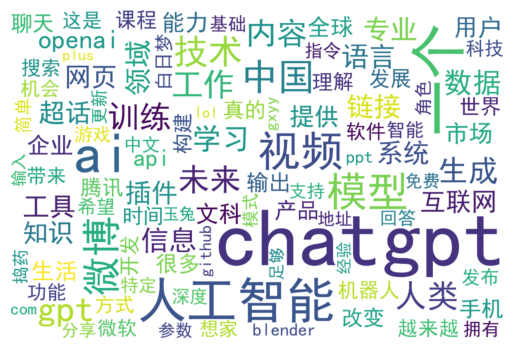

In [150]:
# 根据词袋模型分析结果绘制词云图
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=100,  # 设置最大显示的词数
    max_font_size=200  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()